In [10]:
import joblib
import signalprocessing as sp
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors


In [11]:
# Load data
ecg, heartsound, abp = joblib.load("../data/dobutamine.joblib")

In [12]:
# Calculate ECG features for pigs
idx_r_peak, hr = sp.calc_ecg_for_pig(ecg['time'],
                                      ecg['value'], 
                                      ecg['sampling_rate'],
                                      distance=250,
                                      height=5000)

# Calculate heart sound features with ECG
ts1, ts2, ys1, ys2, intv =  sp.calc_heart_sound_with_ecg(heartsound['time'],
                                                      heartsound['value'], 
                                                      heartsound['sampling_rate'],
                                                      rpeaks_idx=idx_r_peak,
                                                      param_height=0.1,
                                                      param_distance=0.2,
                                                    )
# Calculate arterial blood pressure (ABP) features
idx_time_sbp, signal_sbp, idx_time_dbp, signal_dbp, signal_pp, dP_dt_max = sp.calc_abp(abp['time'],
                                                                             abp['value'],
                                                                             fs=abp['sampling_rate'])
# Extract ECG features
ecg_feat = sp.Ecg_feat(idx_r_peak, hr)

# Extract heart sound features
hs_feat = sp.Hls_feat(ts1, ts2, ys1, ys2, intv)

# Extract ABP features
abp_feat = sp.Abp_feat(idx_time_sbp, signal_sbp, idx_time_dbp, signal_dbp, signal_pp, dP_dt_max)

# Set time segment for feature extraction
time_segment = [ecg['time'][0], ecg['time'][-1]]

# Extract overall features
feat = sp.extract_features(ecg, ecg_feat, hs_feat, abp, abp_feat, time_segment)

# Apply filter to heart sound signal
signal_hs_filtered = sp.butter_filter(heartsound['value'], lowcut=25, highcut=150, fs=heartsound['sampling_rate'])


[0.0, 1129.9977499995023]


/var/folders/zg/4gfgyts10mv0_b16vq9kxjw00000gn/T/ipykernel_76125/65138375.py:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0].set_linewidth(5)


Text(-120, -60, 'Stop')

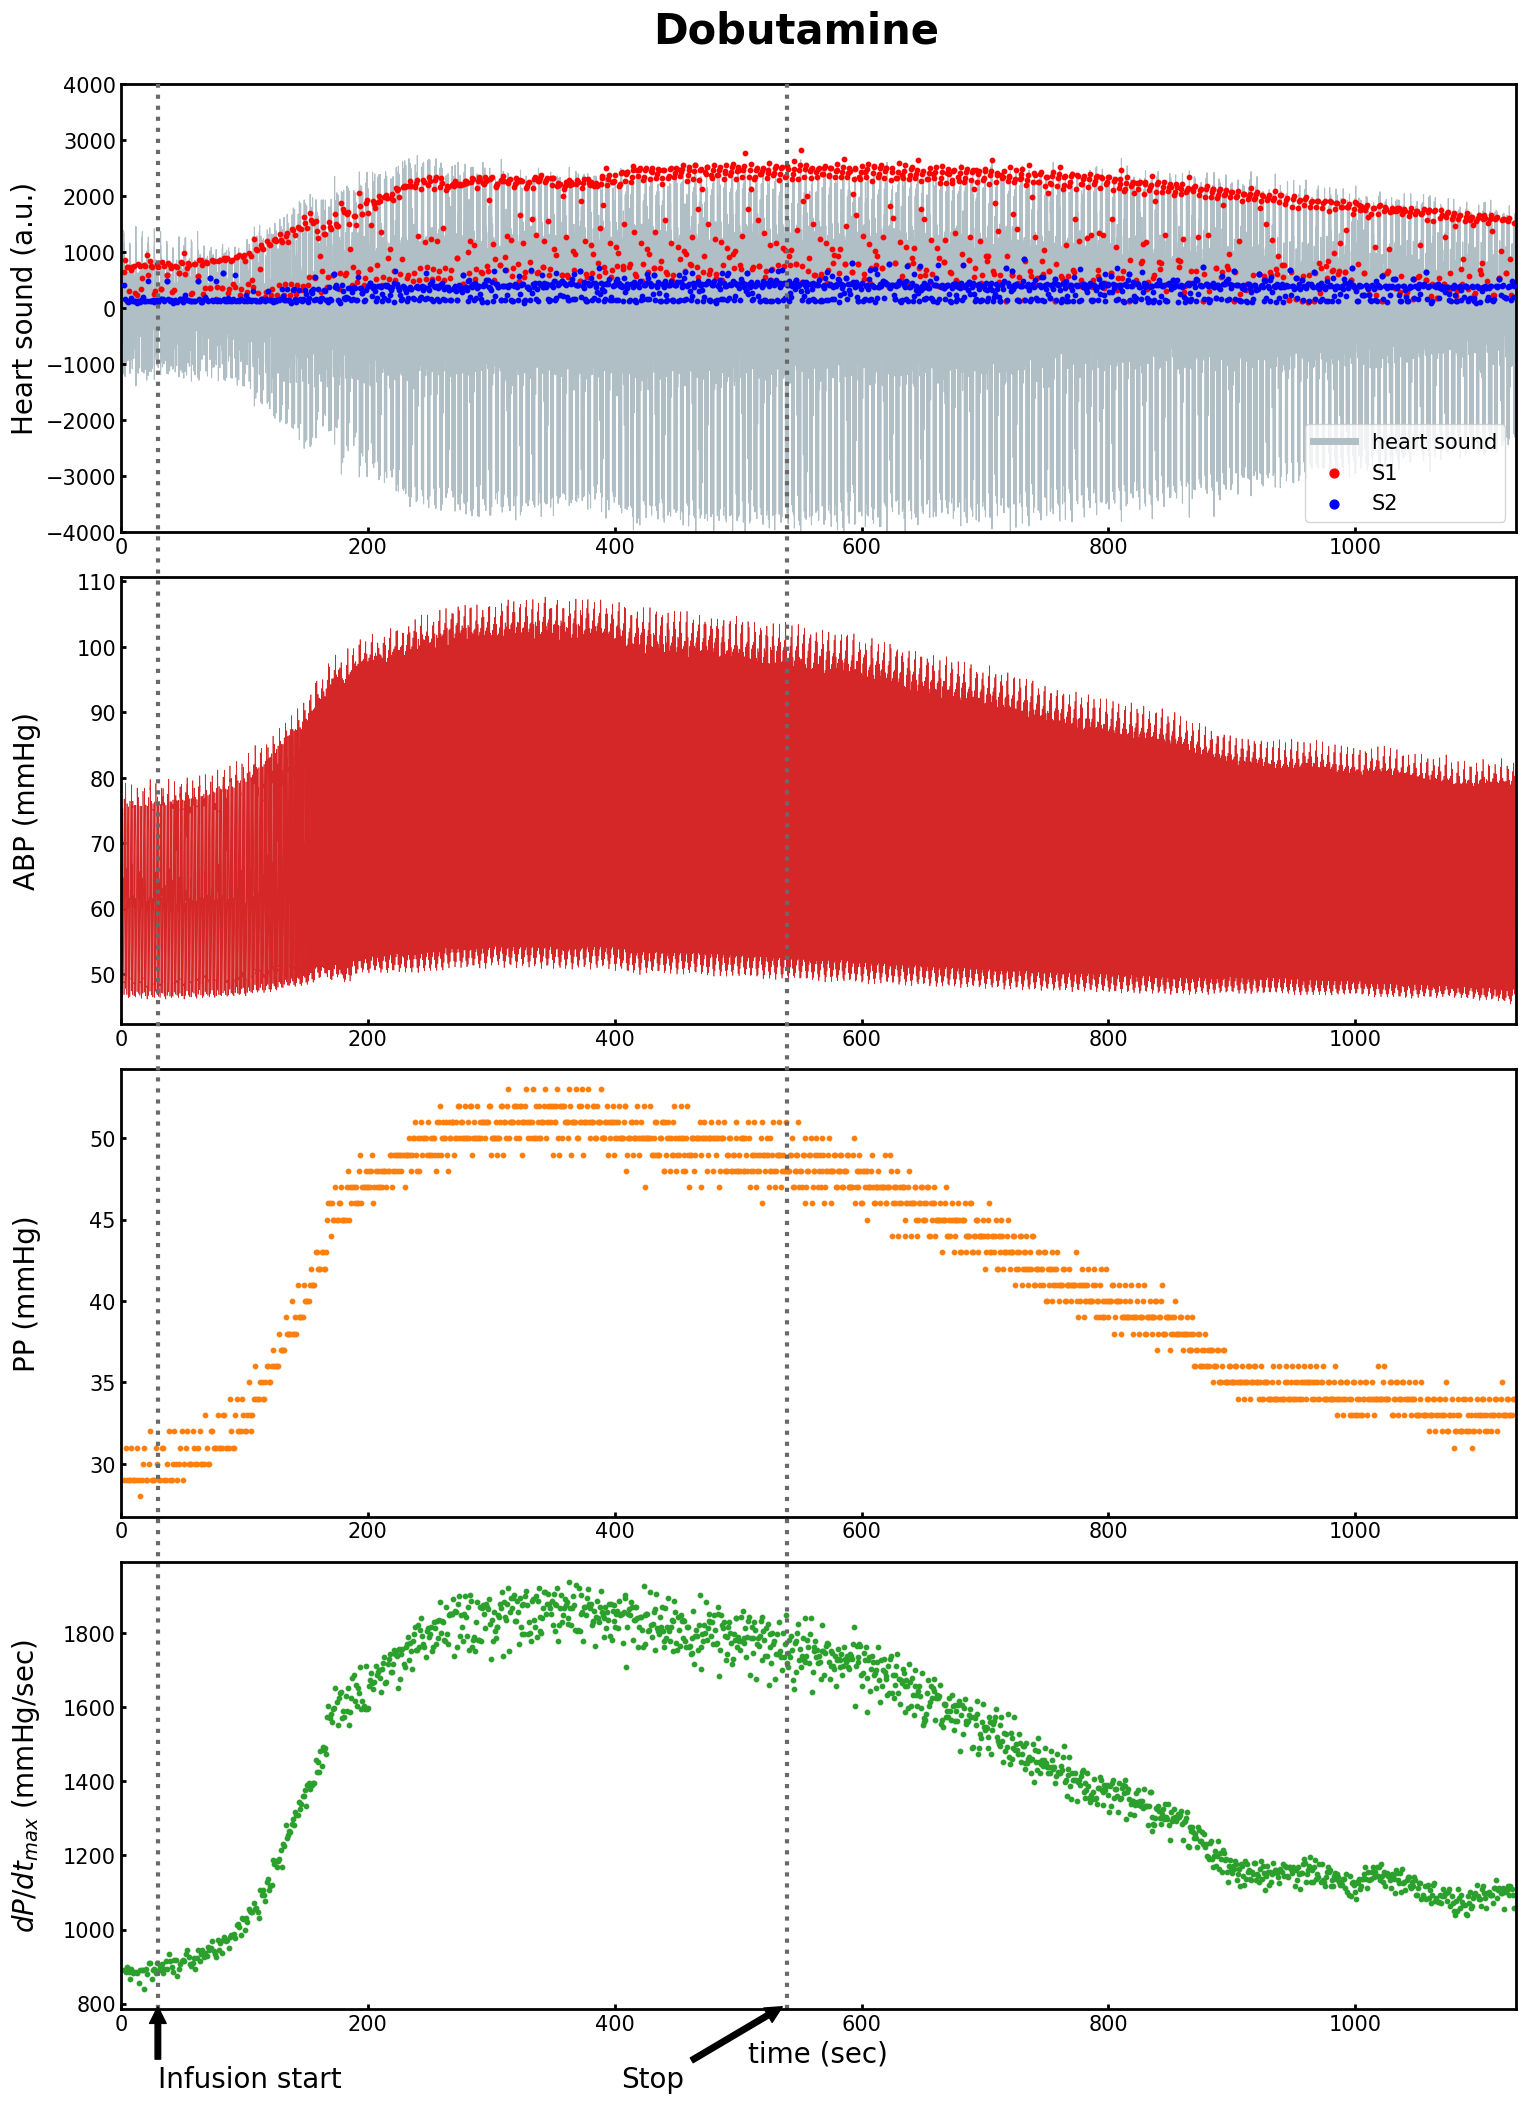

In [13]:
fig = plt.figure(figsize=(18, 25))
plt.suptitle("Dobutamine", weight="bold", fontsize=30, y=0.91)

gs = GridSpec(4, 1, hspace=0.1)  

###############
# Heart sound #
###############
ax = plt.subplot(gs[0])
ax.tick_params(axis="both", direction="in", labelsize=15, width=2)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
ax.plot(heartsound['time'], signal_hs_filtered, color="#B0BEC5", linewidth=0.8, label='heart sound', zorder=1)
ax.scatter(feat.time_s1_peaks, feat.value_s1_peaks, s=10, c='red', label='S1', zorder=2)
ax.scatter(feat.time_s2_peaks, feat.value_s2_peaks, s=10, c='blue', label='S2', zorder=3)
legend = ax.legend(loc="lower right", fontsize=15, markerscale=2)
legend.legendHandles[0].set_linewidth(5)
ax.set_xlim(time_segment)
ax.set_ylim([-4000, 4000])
ax.set_ylabel("Heart sound (a.u.)", fontsize=20, labelpad=5)

###############
# ABP         #
###############
ax = plt.subplot(gs[1])
ax.tick_params(axis="both", direction="in", labelsize=15, width=2)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
ax.plot(abp['time'], abp['value'], color="tab:red", linewidth=0.5, alpha=1, label='ABP')
ax.set_xlim(time_segment)
# ax.set_title("Arterial blood pressure", fontsize=20)
ax.set_ylabel("ABP (mmHg)", fontsize=20, labelpad=25)

###############
# PP          #
###############
ax = plt.subplot(gs[2])
ax.tick_params(axis="both", direction="in", labelsize=15, width=2)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
ax.scatter(feat.time_sbp, feat.pulse_pressure, s=10, color="tab:orange", label=None)

ax.set_xlim(time_segment)
ax.set_ylabel("PP (mmHg)", fontsize=20, labelpad=35)

###############
# dP/dt max   #
###############
ax = plt.subplot(gs[3])
ax.tick_params(axis="both", direction="in", labelsize=15, width=2)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
ax.scatter(feat.time_sbp, feat.dpdt_max, s=10, color="tab:green", label=None)
ax.set_xlim(time_segment)
# ax.set_ylim()
ax.set_xlabel('time (sec)', fontsize=20)
ax.set_ylabel("$dP/dt_{max}$ (mmHg/sec)", fontsize=20, labelpad=15)

ax.axvline(x=30, color='dimgray', linestyle=':', linewidth=3, ymax=4.3, clip_on=False)
ax.annotate('Infusion start',
            xy=(30, 800), xycoords='data',
            xytext=(0, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=20)

ax.axvline(x=540, color='dimgray', linestyle=':', linewidth=3, ymax=4.3, clip_on=False)
ax.annotate('Stop',
            xy=(540, 800), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=20)


In [14]:
ecg, heartsound, abp = joblib.load("../data/esmolol.joblib")

In [15]:
# Calculate ECG features for pigs
idx_r_peak, hr = sp.calc_ecg_for_pig(ecg['time'],
                                      ecg['value'], 
                                      ecg['sampling_rate'],
                                      distance=150,
                                    height=2000)

# Calculate heart sound features with ECG
ts1, ts2, ys1, ys2, intv =  sp.calc_heart_sound_with_ecg(heartsound['time'],
                                                      heartsound['value'], 
                                                      heartsound['sampling_rate'],
                                                      rpeaks_idx=idx_r_peak,
                                                      param_height=0.1,
                                                      param_distance=0.2,
                                                    )
# Calculate arterial blood pressure (ABP) features
idx_time_sbp, signal_sbp, idx_time_dbp, signal_dbp, signal_pp, dP_dt_max = sp.calc_abp(abp['time'],
                                                                             abp['value'],
                                                                             fs=abp['sampling_rate'])
# Extract ECG features
ecg_feat = sp.Ecg_feat(idx_r_peak, hr)

# Extract heart sound features
hs_feat = sp.Hls_feat(ts1, ts2, ys1, ys2, intv)

# Extract ABP features
abp_feat = sp.Abp_feat(idx_time_sbp, signal_sbp, idx_time_dbp, signal_dbp, signal_pp, dP_dt_max)

# Set time segment for feature extraction
time_segment = [0, 600]

# Extract overall features
feat = sp.extract_features(ecg, ecg_feat, hs_feat, abp, abp_feat, time_segment)

# Apply filter to heart sound signal
signal_hs_filtered = sp.butter_filter(heartsound['value'], lowcut=25, highcut=150, fs=heartsound['sampling_rate'])

[0, 600]


/var/folders/zg/4gfgyts10mv0_b16vq9kxjw00000gn/T/ipykernel_76125/821743232.py:16: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0].set_linewidth(5)


Text(0, -60, 'Injection')

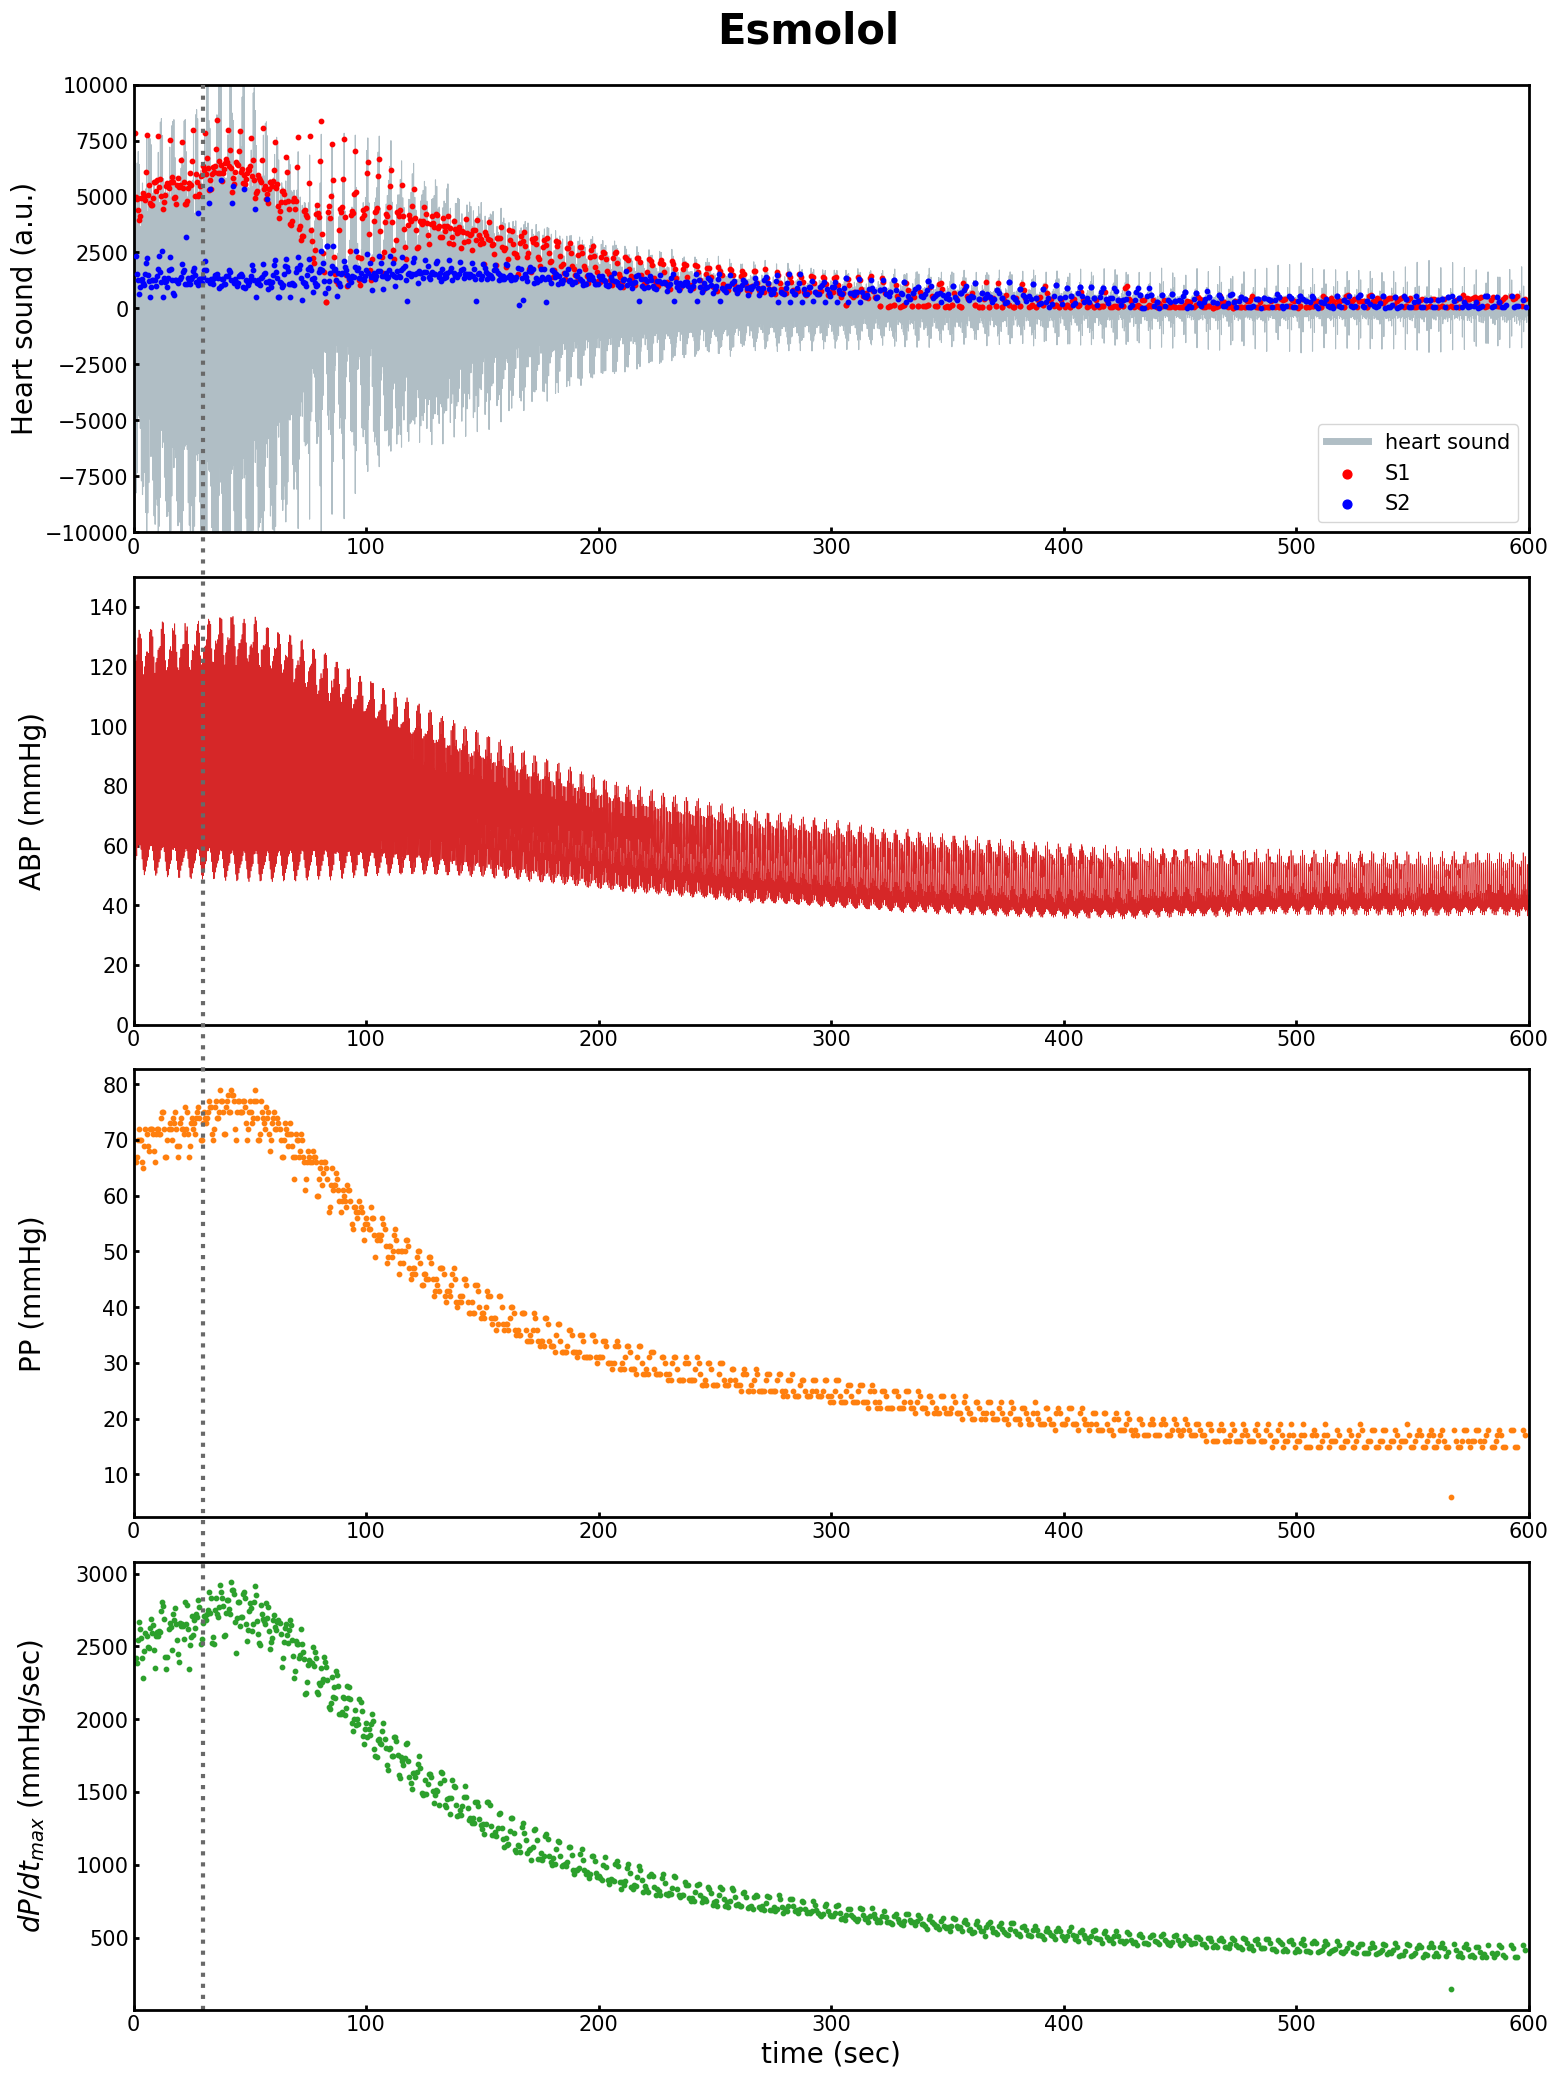

In [16]:
fig = plt.figure(figsize=(18, 25))
plt.suptitle("Esmolol", weight="bold", fontsize=30, y=0.91)

gs = GridSpec(4, 1, hspace=0.1)  # , width_ratios=[3,1,1])
###############
# Heart sound #
###############
ax = plt.subplot(gs[0])
ax.tick_params(axis="both", direction="in", labelsize=15, width=2)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
ax.plot(heartsound['time'], signal_hs_filtered, color="#B0BEC5", linewidth=0.8, label='heart sound', zorder=1)
ax.scatter(feat.time_s1_peaks, feat.value_s1_peaks, s=10, c='red', label='S1', zorder=2)
ax.scatter(feat.time_s2_peaks, feat.value_s2_peaks, s=10, c='blue', label='S2', zorder=3)
legend = ax.legend(loc="lower right", fontsize=15, markerscale=2)
legend.legendHandles[0].set_linewidth(5)
ax.set_xlim(time_segment)
ax.set_ylim([-10000, 10000])
ax.set_ylabel("Heart sound (a.u.)", fontsize=20, labelpad=5)
# ax.text(0.01, 0.05, "Heart sound", fontsize=20, transform=ax.transAxes)

###############
# ABP         #
###############
ax = plt.subplot(gs[1])
ax.tick_params(axis="both", direction="in", labelsize=15, width=2)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
ax.plot(abp['time'], abp['value'], color="tab:red", linewidth=0.5, alpha=1, label='ABP')
ax.set_xlim(time_segment)
ax.set_ylim([0,150])
ax.set_ylabel("ABP (mmHg)", fontsize=20, labelpad=30)

###############
# PP          #
###############
ax = plt.subplot(gs[2])
ax.tick_params(axis="both", direction="in", labelsize=15, width=2)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
ax.scatter(feat.time_sbp, feat.pulse_pressure, s=10, color="tab:orange", label=None)
# ax.plot(feat.time_sbp, feat.pulse_pressure, 'o-', markersize=1, color="tab:orange", label=None)

ax.set_xlim(time_segment)
# ax.set_ylim()
ax.set_ylabel("PP (mmHg)", fontsize=20, labelpad=40)

###############
# dP/dt max   #
###############
ax = plt.subplot(gs[3])
ax.tick_params(axis="both", direction="in", labelsize=15, width=2)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
ax.scatter(feat.time_sbp, feat.dpdt_max, s=10, color="tab:green", label=None)
ax.set_xlim(time_segment)
# ax.set_ylim()
ax.set_xlabel('time (sec)', fontsize=20)
ax.set_ylabel("$dP/dt_{max}$ (mmHg/sec)", fontsize=20, labelpad=20)

ax.axvline(x=30, color='dimgray', linestyle=':', linewidth=3, ymax=4.3, clip_on=False)
ax.annotate('Injection',
            xy=(30, 0), xycoords='data',
            xytext=(0, -60), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=20)
